In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
from scipy.stats import zscore
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from collections import Counter
import plotly.express as px
import numpy as np
from sklearn.metrics import silhouette_score
from prettytable import PrettyTable

In [21]:
data = pd.read_csv('dane_do_modelu.csv', sep=';')

In [22]:
data

,G3,address,reason,Mjob,higher,Fjob,goout,paid,Fedu,studytime,internet,romantic,failures,age
0,6,0,2,3,1,0,4,0,4,1,0,0,0,18
1,6,0,2,3,1,4,3,0,1,1,1,0,0,17
2,10,0,3,3,1,4,2,1,1,1,1,0,3,15
3,15,0,0,1,1,2,2,1,2,0,1,1,0,15
4,10,0,0,4,1,4,2,1,3,1,0,0,0,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,9,0,2,2,1,2,4,1,2,1,0,0,2,19
391,16,0,2,2,1,2,5,0,1,1,1,0,0,17
392,7,1,2,4,1,4,3,0,1,1,0,0,3,19
393,10,1,2,2,1,4,1,0,2,1,1,0,0,18


In [23]:
X = data.drop('G3', axis=1)
y = data['G3']

In [24]:
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size=0.3, 
    random_state=308289
)

In [25]:
X_train = zscore(X_train)
X_test = zscore(X_test)

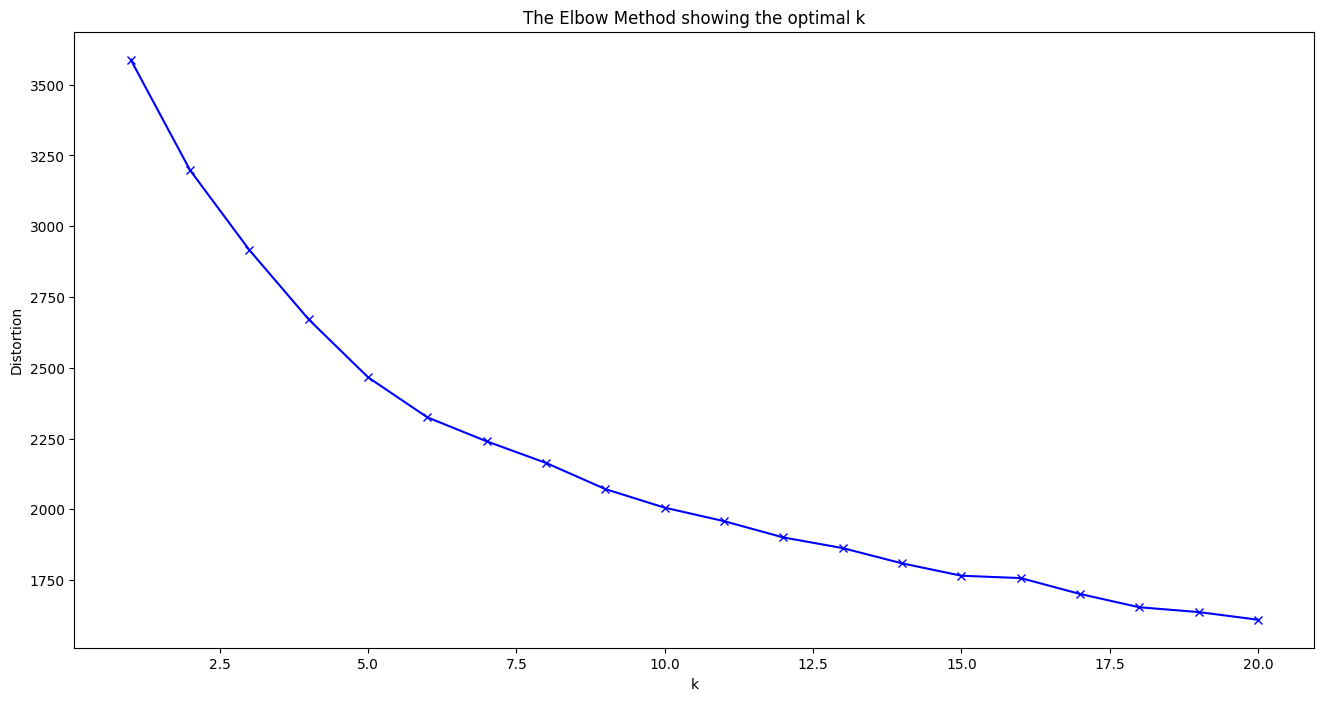

In [26]:
distortions = []
K = range(1,21)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(X_train)
    distortions.append(kmeanModel.inertia_)

plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

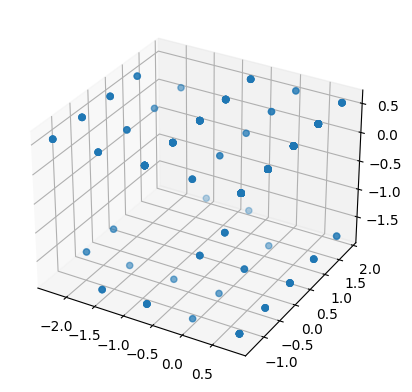

In [27]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_train['Fjob'], X_train['age'], X_train['studytime'])
plt.show()

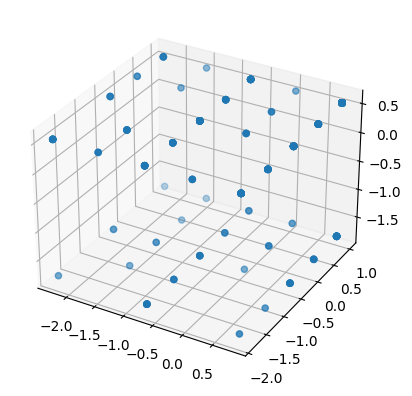

In [28]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_train['Fjob'], X_train['Mjob'], X_train['studytime'])
plt.show()

In [29]:
def kmeans(k):
    model = KMeans(
        n_clusters=k,
        random_state=308289
    )
    model.fit(X_train)
    
    numbers = Counter(sorted(model.labels_))
    fig = px.bar(
        x=numbers.keys(), 
        y=numbers.values(),
        text=numbers.values(),
        labels={
            'x': 'Grupa',
            'y': 'Liczebność'
        }
    )
    fig.show()
    return (model.inertia_, silhouette_score(X_train, model.predict(X_train)))

In [30]:
#for k in range(3,20):
    #print(kmeans(k))

In [31]:
model = KMeans(
        n_clusters=5,
        random_state=308289
)

In [32]:
model.fit(X_train)

KMeans(n_clusters=5, random_state=308289)

In [33]:
silhouette_score(X_train, model.predict(X_train))

0.11441569903148255

In [34]:
centroid = pd.DataFrame(model.cluster_centers_, columns=X_train.columns, index=range(1, 6))
centroid['Liczebność'] = Counter(sorted(model.labels_)).values()

In [35]:
centroid['Liczebność'].astype('int')

1    52
2    66
3    92
4    54
5    12
Name: Liczebność, dtype: int32

In [36]:
centroid.T

,1,2,3,4,5
address,0.990252,-0.220147,-0.395195,-0.056056,0.201802
reason,0.245828,0.437828,-0.508928,-0.078584,0.782103
Mjob,0.565085,-0.934724,0.183653,0.197448,0.395759
higher,0.213201,0.213201,0.213201,0.213201,-4.690416
Fjob,0.414417,-1.037435,0.479817,0.027748,0.106626
goout,-0.028185,-0.271149,0.183201,-0.129276,0.790658
paid,-0.358861,0.023968,0.322243,-0.078119,-0.695751
Fedu,-0.720013,0.920563,-0.097432,-0.075407,-0.856728
studytime,0.419063,0.269364,0.555029,-1.801709,0.555029
internet,-1.081796,0.090256,0.366283,0.305236,0.009639


In [37]:
model.predict(X_test)

array([0, 2, 3, 1, 2, 3, 0, 0, 2, 3, 3, 4, 1, 0, 3, 1, 2, 2, 0, 1, 1, 2,
       2, 2, 2, 3, 3, 2, 3, 1, 2, 3, 3, 2, 2, 0, 4, 0, 1, 1, 2, 4, 2, 2,
       0, 0, 2, 2, 2, 2, 1, 1, 2, 1, 0, 2, 1, 3, 4, 0, 2, 2, 3, 3, 1, 1,
       1, 3, 2, 2, 3, 1, 4, 2, 1, 2, 3, 3, 2, 2, 4, 0, 2, 2, 2, 3, 1, 0,
       2, 2, 2, 1, 2, 2, 1, 2, 3, 2, 3, 3, 0, 2, 2, 2, 0, 0, 2, 2, 2, 2,
       0, 2, 1, 0, 1, 4, 1, 1, 0])

In [38]:
px.box(x=model.predict(X_test), y=y_test.tolist())